# Undirected Graph

In [1]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')
df

HS6_i   HS6_j  n_ij   n_i   n_j       n      psim  psim_norm  link01  \
0      107111  107112   356  6275  6167  731532  6.729699   0.741258       1   
1      181214  181219    60  4081  3683  731532  2.920225   0.489825       1   
2      181212  181214    59  3287  4081  731532  3.217504   0.525786       1   
3      310112  310912    57  3568  3342  731532  3.496849   0.555244       1   
4      181213  181214    55  2586  4081  731532  3.812421   0.584409       1   
...       ...     ...   ...   ...   ...     ...       ...        ...     ...   
40086  242034  289230     1  1226  1175  731532  0.507814  -0.326423       0   
40087  242034  289227     1  1226   969  731532  0.615771  -0.237799       0   
40088  242034  282983     1  1226  1097  731532  0.543922  -0.295403       0   
40089  242034  282922     1  1226  1720  731532  0.346908  -0.484882       0   
40090  205959  212013     1   682  1055  731532  1.016709   0.008285       1   

                short_name_ENG_i           short_name_ENG_j  
0      Fresh bread containing by  Cake and pastry products;  
1      Printed books, brochures,  Printed calendars of any   
2      Printed commercial catalo  Printed books, brochures,  
3      Wooden furniture of a kin  Wooden bedroom furniture   
4      Printed newspapers, journ  Printed books, brochures,  
...                          ...                        ...  
40086  Tubes and pipes, of non-c  Pile-drivers and pile-ext  
40087  Tubes and pipes, of non-c  Bulldozer or angledozer b  
40088  Tubes and pipes, of non-c  Cylinders for calendering  
40089  Tubes and pipes, of non-c         Fire extinguishers  
40090  Ion-exchangers; getters f  Medicaments of alkaloids   

[40091 rows x 11 columns]

In [2]:
G = nx.Graph()

# Add the nodes

unique_product_codes = set(df['HS6_i']).union(set(df['HS6_j']))

G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['n_ij']
    G.add_edge(product_i, product_j, weight=weight)

# nx.draw(G,node_size=50,with_labels=True)


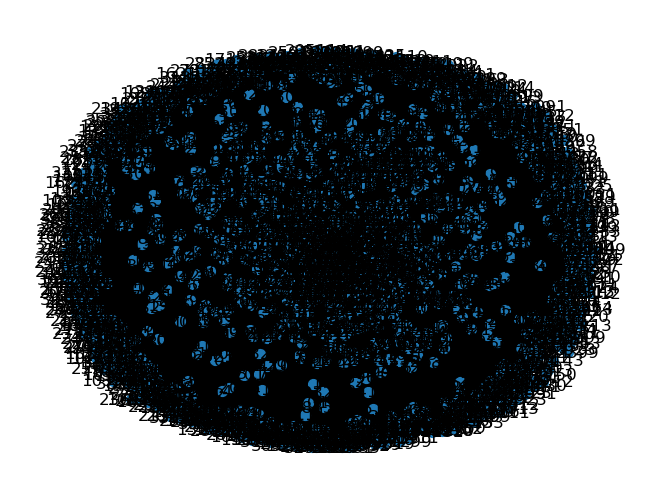

In [3]:
# Calculate the total value of weights
total_weight = sum([d['weight'] for u, v, d in G.edges(data=True)])

# Normalize weights using the total value
for u, v, d in G.edges(data=True):
    d['weight'] /= total_weight

nx.draw(G,node_size=50,with_labels=True)


# Degree

Density: 0.04331914249902753
Average total degree: 58.914033798677444


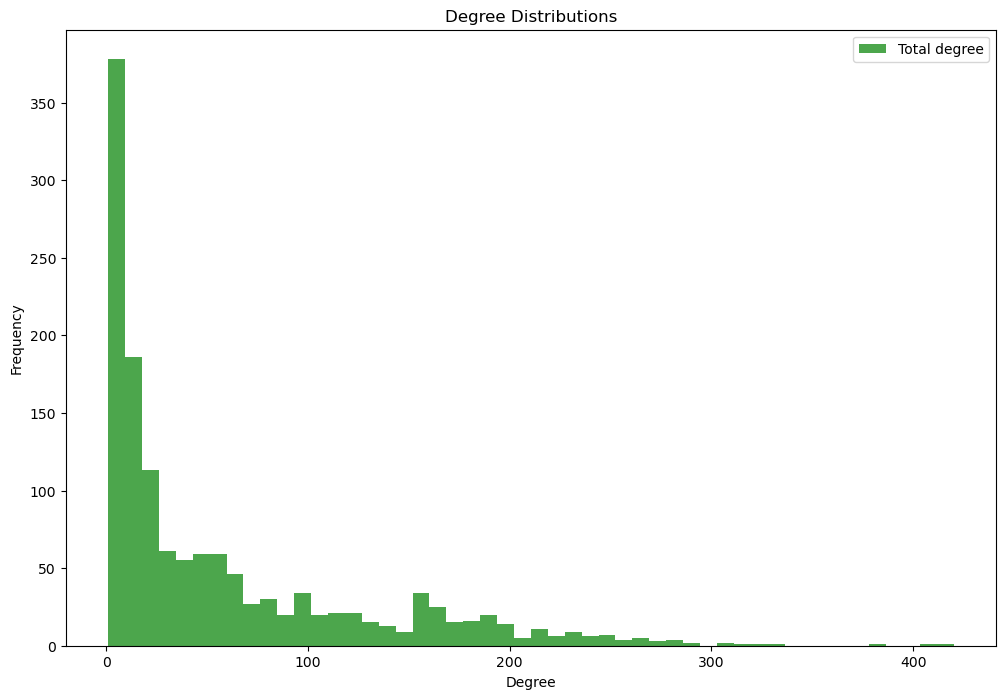

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Density
density = nx.density(G)
print("Density:", density)

# Average degrees
total_degrees = dict(G.degree())


average_total_degree = sum(total_degrees.values()) / len(total_degrees)

print("Average total degree:", average_total_degree)

# Degree distributions

total_degree_sequence = [degree for node, degree in G.degree()]

# Plot degree distributions
plt.figure(figsize=(12, 8))

plt.hist(total_degree_sequence, bins=50, color='green', alpha=0.7, label='Total degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distributions')
plt.legend()
plt.show()

# Density

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Density
density1 = nx.density(G)
print("Density:", density1)

# Identify isolated nodes
isolated_nodes = [node for node, degree in G.degree() if degree == 0]

# Remove isolated nodes
G.remove_nodes_from(isolated_nodes)

# Compute the largest weakly connected component
largest_weakly_connected_component_nodes = max(nx.connected_components(G), key=len)
largest_weakly_connected_component = G.subgraph(largest_weakly_connected_component_nodes)


density2 = nx.density(largest_weakly_connected_component)
print("Density_largest_connected_component:", density2)

Density: 0.04331914249902753
Density_largest_connected_component: 0.04331914249902753


# Maximum Likelihood

Calculating best minimal value for power law fit


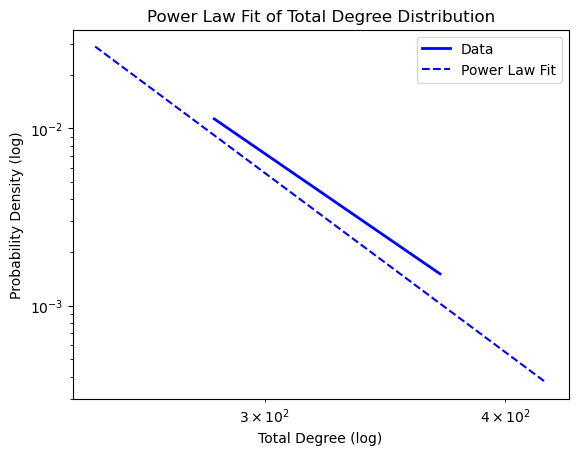

Alpha (scaling parameter): 8.088010355444128
Xmin (minimum value of the power law distribution): 245.0


In [6]:
import powerlaw

# Fit power law to the total degree distribution
fit = powerlaw.Fit(total_degree_sequence)

# Get the alpha (scaling parameter) and xmin (minimum value of the power law distribution)
alpha = fit.alpha
xmin = fit.xmin

# Plot the degree distribution and the power law fit
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig)

# Visualize the data and the fit on a log-log scale
plt.xlabel('Total Degree (log)')
plt.ylabel('Probability Density (log)')
plt.title('Power Law Fit of Total Degree Distribution')
plt.legend(['Data', 'Power Law Fit'])
plt.show()

print("Alpha (scaling parameter):", alpha)
print("Xmin (minimum value of the power law distribution):", xmin)


In [7]:
As = nx.adjacency_matrix(G)
A =As.todense()
print(A)


[[0.00000000e+00 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.69652552e-05 0.00000000e+00 0.00000000e+00 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 ...
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 0.00000000e+00
  1.69652552e-05 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  0.00000000e+00 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 0.00000000e+00]]


In [8]:
d = nx.degree(G)
d = dict(d)

print("average degree: ", sum(d.values())/len(G.nodes))

average degree:  58.914033798677444


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

(0.0, 440.0)

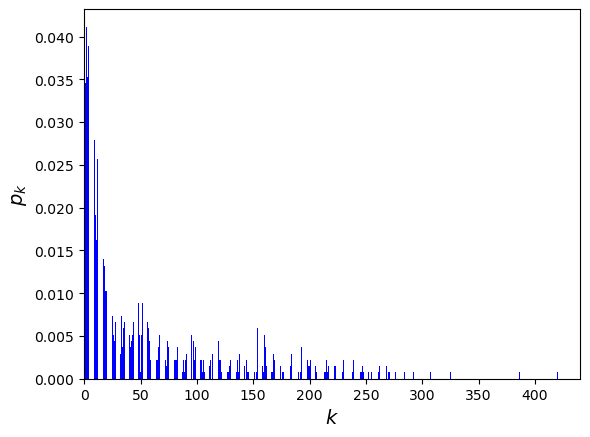

In [10]:
import matplotlib.pyplot as plt
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

plt.bar(x, y, width=0.5, color="blue")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("$p_k$", fontsize=14)
plt.xlim([0,440])

# Centrality

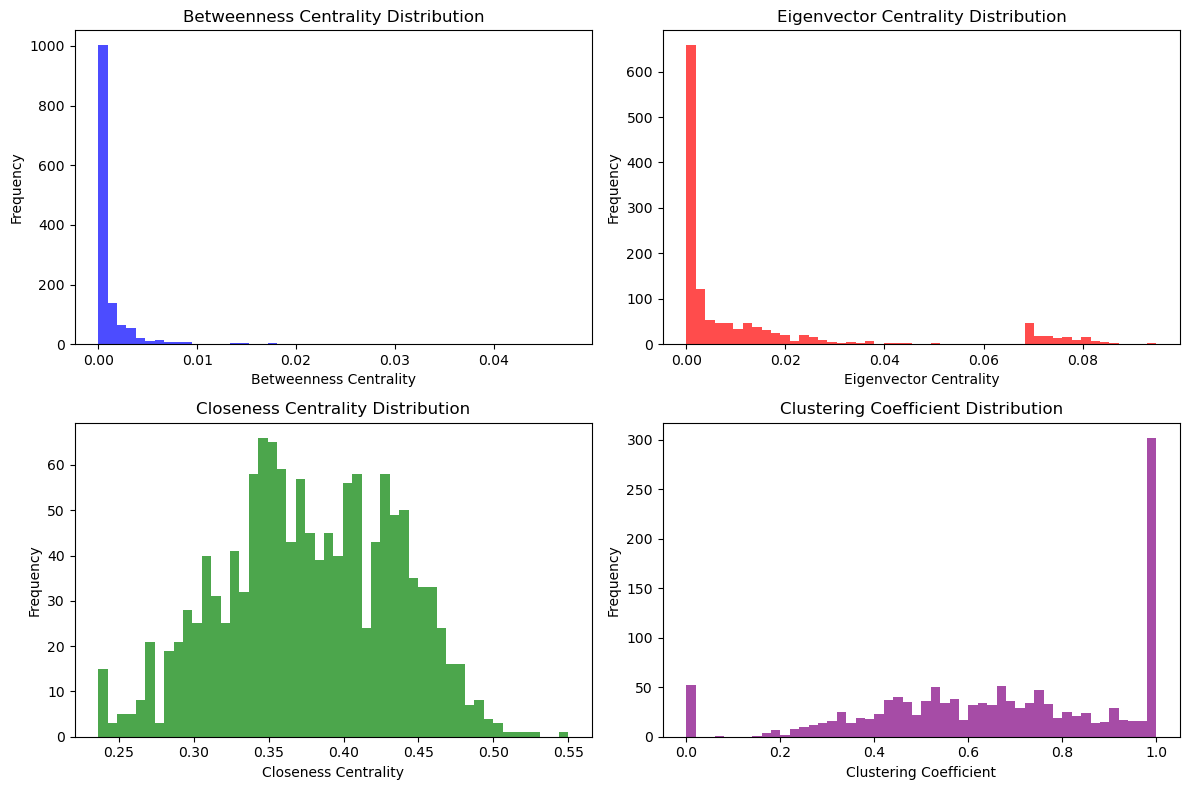

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Closeness Centrality
closeness = nx.closeness_centrality(G)

# Clustering Coefficient
clustering = nx.clustering(G)

# Plot distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(list(betweenness.values()), bins=50, color='blue', alpha=0.7)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(list(eigenvector.values()), bins=50, color='red', alpha=0.7)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(list(closeness.values()), bins=50, color='green', alpha=0.7)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(list(clustering.values()), bins=50, color='purple', alpha=0.7)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [12]:
import networkx as nx
import pandas as pd

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_ranked_products = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_ranked_products = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_ranked_products = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
clustering_ranked_products = sorted(clustering_coefficient, key=clustering_coefficient.get, reverse=True)

# Create DataFrames for each centrality metric
betweenness_df = pd.DataFrame({
    'Rank': range(1, len(betweenness_ranked_products) + 1),
    'HS6_Code': betweenness_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in betweenness_ranked_products],
    'Betweenness_Centrality': [betweenness_centrality[product] for product in betweenness_ranked_products]
})

eigenvector_df = pd.DataFrame({
    'Rank': range(1, len(eigenvector_ranked_products) + 1),
    'HS6_Code': eigenvector_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in eigenvector_ranked_products],
    'Eigenvector_Centrality': [eigenvector_centrality[product] for product in eigenvector_ranked_products]
})

closeness_df = pd.DataFrame({
    'Rank': range(1, len(closeness_ranked_products) + 1),
    'HS6_Code': closeness_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in closeness_ranked_products],
    'Closeness_Centrality': [closeness_centrality[product] for product in closeness_ranked_products]
})

clustering_df = pd.DataFrame({
    'Rank': range(1, len(clustering_ranked_products) + 1),
    'HS6_Code': clustering_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in clustering_ranked_products],
    'Clustering_Coefficient': [clustering_coefficient[product] for product in clustering_ranked_products]
})

# Save DataFrames to Excel file with different sheet names
output_file = './Data/centrality_rankings_similarity.xlsx'  # Change the file name and path as needed
with pd.ExcelWriter(output_file) as writer:
    betweenness_df.to_excel(writer, sheet_name='Betweenness_Centrality', index=False)
    eigenvector_df.to_excel(writer, sheet_name='Eigenvector_Centrality', index=False)
    closeness_df.to_excel(writer, sheet_name='Closeness_Centrality', index=False)
    clustering_df.to_excel(writer, sheet_name='Clustering_Coefficient', index=False)


In [18]:
import networkx as nx

# Assuming you have already created the directed graph G

# Get the largest connected component
largest_connected_component = max(nx.connected_components(G), key=len)

# Find all shortest paths
shortest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))

# Find all longest paths
longest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))

# Initialize variables to store smallest and largest paths
smallest_paths = []
largest_paths = []

# Iterate over all shortest paths to find the smallest one with at least 2 nodes
smallest_length = float('inf')
for source, targets in shortest_paths:
    for target, path in targets.items():
        if len(path) >= 2:
            path_length = len(path)
            if path_length < smallest_length:
                smallest_length = path_length
                smallest_paths = [(source, target, path)]
            elif path_length == smallest_length:
                smallest_paths.append((source, target, path))

# Iterate over all longest paths to find the largest one in terms of number of nodes
largest_node_count = 0
for source, targets in longest_paths:
    for target, path in targets.items():
        if len(path) > largest_node_count:
            largest_node_count = len(path)
            largest_paths = [(source, target, path)]
        elif len(path) == largest_node_count:
            largest_paths.append((source, target, path))

# Print smallest paths
print("Smallest Paths (Length >= 2):")
for source, target, path in smallest_paths:
    print("From", source, "to", target, ":", path)

# Print largest paths
print("\nLargest Paths (Maximum Nodes):")
for source, target, path in largest_paths:
    print("From", source, "to", target, ":", path)


Smallest Paths (Length >= 2):
From 131081 to 131061 : [131081, 131061]
From 131081 to 131050 : [131081, 131050]
From 131081 to 310914 : [131081, 310914]
From 131081 to 310911 : [131081, 310911]
From 131081 to 310113 : [131081, 310113]
From 131081 to 139216 : [131081, 139216]
From 131081 to 132020 : [131081, 132020]
From 131081 to 131085 : [131081, 131085]
From 131081 to 131083 : [131081, 131083]
From 131081 to 131071 : [131081, 131071]
From 131081 to 131062 : [131081, 131062]
From 131081 to 131040 : [131081, 131040]
From 131082 to 206014 : [131082, 206014]
From 131082 to 206011 : [131082, 206011]
From 131082 to 139420 : [131082, 139420]
From 131082 to 132032 : [131082, 132032]
From 131082 to 139411 : [131082, 139411]
From 131082 to 139412 : [131082, 139412]
From 131082 to 206012 : [131082, 206012]
From 131082 to 259929 : [131082, 259929]
From 131082 to 324039 : [131082, 324039]
From 131082 to 289932 : [131082, 289932]
From 131083 to 310914 : [131083, 310914]
From 131083 to 310113 : [13

In [20]:
import networkx as nx
import pandas as pd

# Assuming you have already created the directed graph G

# Get the largest connected component
largest_connected_component = max(nx.connected_components(G), key=len)

# Find all shortest paths
shortest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))

# Find all longest paths
longest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))

# Initialize variables to store smallest and largest paths
smallest_paths = []
largest_paths = []

# Iterate over all shortest paths to find the smallest one with at least 2 nodes
smallest_length = float('inf')
for source, targets in shortest_paths:
    for target, path in targets.items():
        if len(path) >= 2:
            path_length = len(path)
            if path_length < smallest_length:
                smallest_length = path_length
                smallest_paths = [(source, target, path)]
            elif path_length == smallest_length:
                smallest_paths.append((source, target, path))

# Iterate over all longest paths to find the largest one in terms of number of nodes
largest_node_count = 0
for source, targets in longest_paths:
    for target, path in targets.items():
        if len(path) > largest_node_count:
            largest_node_count = len(path)
            largest_paths = [(source, target, path)]
        elif len(path) == largest_node_count:
            largest_paths.append((source, target, path))

# Convert paths to dataframes
smallest_df = pd.DataFrame(smallest_paths, columns=["Source", "Target", "Path"])
largest_df = pd.DataFrame(largest_paths, columns=["Source", "Target", "Path"])

# Save dataframes to Excel file
with pd.ExcelWriter("path_results.xlsx") as writer:
    smallest_df.to_excel(writer, sheet_name="Smallest Paths", index=False)
    largest_df.to_excel(writer, sheet_name="Largest Paths", index=False)


In [32]:
import pandas as pd
import networkx as nx

# Load your data into a DataFrame
df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')

# Get the largest connected component
largest_connected_component = max(nx.connected_components(G), key=len)

# Find all shortest paths
shortest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))

# Find all longest paths
longest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))

# Initialize variables to store smallest and largest paths
smallest_paths = []
largest_paths = []

# Iterate over all shortest paths to find the smallest one with at least 2 nodes
smallest_length = float('inf')
for source, targets in shortest_paths:
    for target, path in targets.items():
        if len(path) >= 2:
            path_length = len(path)
            if path_length < smallest_length:
                smallest_length = path_length
                smallest_paths = [(source, target, path)]
            elif path_length == smallest_length:
                smallest_paths.append((source, target, path))

# Iterate over all longest paths to find the largest one in terms of number of nodes
largest_node_count = 0
for source, targets in longest_paths:
    for target, path in targets.items():
        if len(path) > largest_node_count:
            largest_node_count = len(path)
            largest_paths = [(source, target, path)]
        elif len(path) == largest_node_count:
            largest_paths.append((source, target, path))




In [36]:
print(df.head())

    HS6_i   HS6_j  n_ij   n_i   n_j       n      psim  psim_norm  link01  \
0  107111  107112   356  6275  6167  731532  6.729699   0.741258       1   
1  181214  181219    60  4081  3683  731532  2.920225   0.489825       1   
2  181212  181214    59  3287  4081  731532  3.217504   0.525786       1   
3  310112  310912    57  3568  3342  731532  3.496849   0.555244       1   
4  181213  181214    55  2586  4081  731532  3.812421   0.584409       1   

            short_name_ENG_i           short_name_ENG_j  
0  Fresh bread containing by  Cake and pastry products;  
1  Printed books, brochures,  Printed calendars of any   
2  Printed commercial catalo  Printed books, brochures,  
3  Wooden furniture of a kin  Wooden bedroom furniture   
4  Printed newspapers, journ  Printed books, brochures,  


In [43]:
import pandas as pd
import networkx as nx

# Load your data into a DataFrame
df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')


# Get the largest connected component
largest_connected_component = max(nx.connected_components(G), key=len)

# Find all shortest paths
shortest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))

# Find all longest paths
longest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))

# Initialize variables to store smallest and largest paths
smallest_paths = []
largest_paths = []

# Iterate over all shortest paths to find the smallest one with at least 2 nodes
smallest_length = float('inf')
for source, targets in shortest_paths:
    for target, path in targets.items():
        if len(path) >= 2:
            path_length = len(path)
            if path_length < smallest_length:
                smallest_length = path_length
                smallest_paths = [(source, target, path)]
            elif path_length == smallest_length:
                smallest_paths.append((source, target, path))

# Iterate over all longest paths to find the largest one in terms of number of nodes
largest_node_count = 0
for source, targets in longest_paths:
    for target, path in targets.items():
        if len(path) > largest_node_count:
            largest_node_count = len(path)
            largest_paths = [(source, target, path)]
        elif len(path) == largest_node_count:
            largest_paths.append((source, target, path))

# Replace node names with real names
def replace_with_real_names(paths, df):
    modified_paths = []
    for source, targets in paths:
        for target, path in targets.items():
            path_real_names = []
            for node in path:
                if node in df['HS6_i'].values:
                    real_name = df.loc[df['HS6_i'] == node, 'short_name_ENG_i'].iloc[0]
                    path_real_names.append(real_name)
                elif node in df['HS6_j'].values:
                    real_name = df.loc[df['HS6_j'] == node, 'short_name_ENG_j'].iloc[0]
                    path_real_names.append(real_name)
                else:
                    path_real_names.append(node)
            modified_paths.append((source, target, path_real_names))
    return modified_paths

# Replace source, target, and path with real names
# Replace source, target, and path with real names
smallest_paths_with_real_names = []
for source, target, path in smallest_paths:
    if source in df['HS6_i'].values:
        real_source = df.loc[df['HS6_i'] == source, 'short_name_ENG_i'].iloc[0]
    elif source in df['HS6_j'].values:
        real_source = df.loc[df['HS6_j'] == source, 'short_name_ENG_j'].iloc[0]
    else:
        real_source = source

    if target in df['HS6_i'].values:
        real_target = df.loc[df['HS6_i'] == target, 'short_name_ENG_i'].iloc[0]
    elif target in df['HS6_j'].values:
        real_target = df.loc[df['HS6_j'] == target, 'short_name_ENG_j'].iloc[0]
    else:
        real_target = target

    real_path = []
    for node in path:
        if node in df['HS6_i'].values:
            real_node = df.loc[df['HS6_i'] == node, 'short_name_ENG_i'].iloc[0]
        elif node in df['HS6_j'].values:
            real_node = df.loc[df['HS6_j'] == node, 'short_name_ENG_j'].iloc[0]
        else:
            real_node = node
        real_path.append(real_node)
    
    smallest_paths_with_real_names.append((real_source, real_target, real_path))

# Replace source, target, and path with real names
largest_paths_with_real_names = []
for source, target, path in largest_paths:
    if source in df['HS6_i'].values:
        real_source = df.loc[df['HS6_i'] == source, 'short_name_ENG_i'].iloc[0]
    elif source in df['HS6_j'].values:
        real_source = df.loc[df['HS6_j'] == source, 'short_name_ENG_j'].iloc[0]
    else:
        real_source = source

    if target in df['HS6_i'].values:
        real_target = df.loc[df['HS6_i'] == target, 'short_name_ENG_i'].iloc[0]
    elif target in df['HS6_j'].values:
        real_target = df.loc[df['HS6_j'] == target, 'short_name_ENG_j'].iloc[0]
    else:
        real_target = target

    real_path = []
    for node in path:
        if node in df['HS6_i'].values:
            real_node = df.loc[df['HS6_i'] == node, 'short_name_ENG_i'].iloc[0]
        elif node in df['HS6_j'].values:
            real_node = df.loc[df['HS6_j'] == node, 'short_name_ENG_j'].iloc[0]
        else:
            real_node = node
        real_path.append(real_node)

    largest_paths_with_real_names.append((real_source, real_target, real_path))


# Convert paths to dataframes
smallest_df = pd.DataFrame(smallest_paths_with_real_names, columns=["Source", "Target", "Path"])
largest_df = pd.DataFrame(largest_paths_with_real_names, columns=["Source", "Target", "Path"])

# Save dataframes to Excel file
with pd.ExcelWriter("Similarity_path_results_with_real_names.xlsx") as writer:
    smallest_df.to_excel(writer, sheet_name="Smallest Paths", index=False)
    largest_df.to_excel(writer, sheet_name="Largest Paths", index=False)


# Community detection

In [ ]:
import networkx as nx
import community


# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print("Assortativity Coefficient:", assortativity)

# Community Detection
# Girvan-Newman algorithm
communities_gn = nx.community.girvan_newman(G)
best_partition_gn = next(communities_gn)
print("Communities (Girvan-Newman):", best_partition_gn)

# Louvain algorithm
# partition_louvain = community.best_partition(G)
# print("Communities (Louvain):", partition_louvain)



Assortativity Coefficient: 0.25185282280165344
Communities (Girvan-Newman): ({131081, 131082, 131083, 131085, 221199, 131092, 131099, 139299, 139311, 139312, 139313, 352310, 139319, 254011, 254012, 254013, 254014, 172111, 172112, 172113, 172114, 172115, 139411, 139412, 139420, 172199, 172211, 172212, 139499, 139510, 172299, 172311, 172312, 172313, 172314, 205111, 205112, 205114, 139599, 139613, 139614, 139615, 139616, 139617, 172399, 172411, 205210, 139699, 279011, 279012, 279013, 279020, 279031, 279032, 279033, 205310, 279041, 279043, 279044, 279045, 279052, 279053, 279060, 279070, 279082, 279099, 205399, 107111, 107112, 139911, 139912, 139913, 139915, 139919, 107199, 107211, 99019, 107212, 107219, 221910, 139999, 221920, 221930, 353011, 221940, 353012, 221950, 271110, 221960, 271121, 271122, 271123, 271124, 221973, 271125, 221971, 271132, 271141, 271142, 271143, 271150, 221999, 107311, 107312, 271161, 271162, 271199, 263011, 263012, 263013, 271210, 263022, 172911, 263023, 271221, 263

# Small world

In [ ]:
import networkx as nx

def average_shortest_path_length(graph):
    shortest_path_lengths = []

    for source in graph.nodes():
        for target in graph.nodes():
            if source != target:
                try:
                    shortest_path_length = nx.shortest_path_length(graph, source=source, target=target)
                    shortest_path_lengths.append(shortest_path_length)
                except nx.NetworkXNoPath:
                    pass

    return sum(shortest_path_lengths) / len(shortest_path_lengths) if shortest_path_lengths else float('nan')

# Assuming you have already created the directed graph G

# Get the number of nodes and edges in the dependency network
num_nodes = len(G.nodes())
num_edges = len(G.edges())

# Calculate the edge probability for the ER random graph
p = num_edges / (num_nodes * (num_nodes - 1))

# Generate the equivalent ER random graph 10 times and compute the average shortest path length and clustering coefficient
avg_shortest_path_er_total = 0
clustering_coeff_er_total = 0
num_iterations = 100

for _ in range(num_iterations):
    er_graph = nx.erdos_renyi_graph(num_nodes, p)
    avg_shortest_path_er_total += average_shortest_path_length(er_graph)
    clustering_coeff_er_total += nx.average_clustering(er_graph)

avg_shortest_path_er_avg = avg_shortest_path_er_total / num_iterations
clustering_coeff_er_avg = clustering_coeff_er_total / num_iterations

# Print the average results
print("ER Random Graph (Average of 100 runs):")
print("- Average Shortest Path Length:", avg_shortest_path_er_avg)
print("- Clustering Coefficient:", clustering_coeff_er_avg)


ER Random Graph (Average of 100 runs):
- Average Shortest Path Length: 2.4949210895967506
- Clustering Coefficient: 0.021678965309589647
